# Using a neural networks with Keras

This notebook is part of a series on using Keras, an open source machine learning API. You can use Keras to use create, train, and modify neural networks and most importantly make predictions with new or preexisting models.

In this notebook we go over the basics of loading and using one of pretrained neural networks built into Keras.

In [1]:
from tensorflow.keras.applications.vgg16 import VGG16
from matplotlib import pyplot as plt

## Loading the model

We will be working with the **VGG16** model to make predictions. Lets load it into our model variable and print out a summary.

In [2]:
model = VGG16()

print(model.summary())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________

## Import an image

Upload an image to use to test the model.

In [3]:
from google.colab import files
uploaded = files.upload()

filename = list(uploaded)[0]

Saving mug.jpg to mug.jpg


## Resize the image

The model expects a certain sized image (224 by 224 pixels). This step squishes it to the required input dimensions.

Using TensorFlow backend.


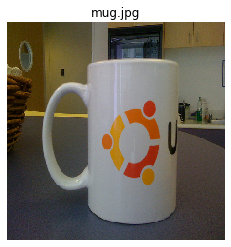

In [4]:
from keras.preprocessing.image import load_img
image = load_img(filename, target_size=(224, 224))

plt.imshow(image)
plt.axis('off')
plt.title(filename)
plt.show()

## Convert and prepare image

In this step we convert the image to a numpy array. Then we reshape it. The model expects an array of images to process so this reshape makes the image an array of one. Then the model has a preprocess function included with it that further manipulates the image values before processing.

In [0]:
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input

image_array = img_to_array(image)
image_array = image_array.reshape((1, image_array.shape[0], image_array.shape[1], image_array.shape[2]))
image_array = preprocess_input(image_array)

## Make the predictions and decode results

The `decode_predictions()` method converts the prediction results in a more readable format. It will include an array of predictions (one for each image input). Each prediction includes an array of the top five matches with the most likely result listed in the first element.

For a single result you can use just this first value.

In [27]:
prediction = model.predict(image_array)

from keras.applications.vgg16 import decode_predictions

labels = decode_predictions(prediction)[0]

for label in labels:
  class_id, description, probability = label
  print("%s %s %.2f%%" % (class_id, description, probability * 100))

n03063599 coffee_mug 75.27%
n03063689 coffeepot 8.37%
n07930864 cup 6.44%
n04398044 teapot 3.03%
n03950228 pitcher 2.59%
